In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as st


# Ejercicio 1

[3, 3, 3, 1, 3, 1, 1, 1, 1, 2]


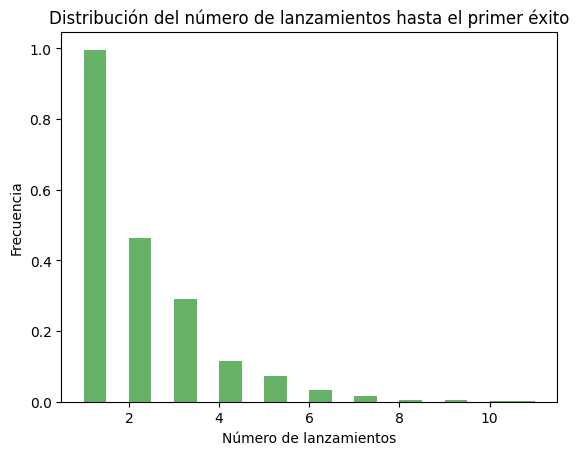

In [ ]:


n = 1
p = 0.5
N = 1000
simulaciones = [st.geom.rvs(p, size=1)[0] for _ in range(N)]

print(simulaciones[:10])

plt.hist(simulaciones, bins=20, density=True, alpha=0.6, color='b')
plt.title("Distribución del número de lanzamientos hasta el primer éxito")
plt.xlabel("Lanzamientos")
plt.ylabel("Frecuencia")
plt.show()


# Ejercicio 2

# Ejercicio 3

# Ejercicio 4 Distribucion Gaussiana

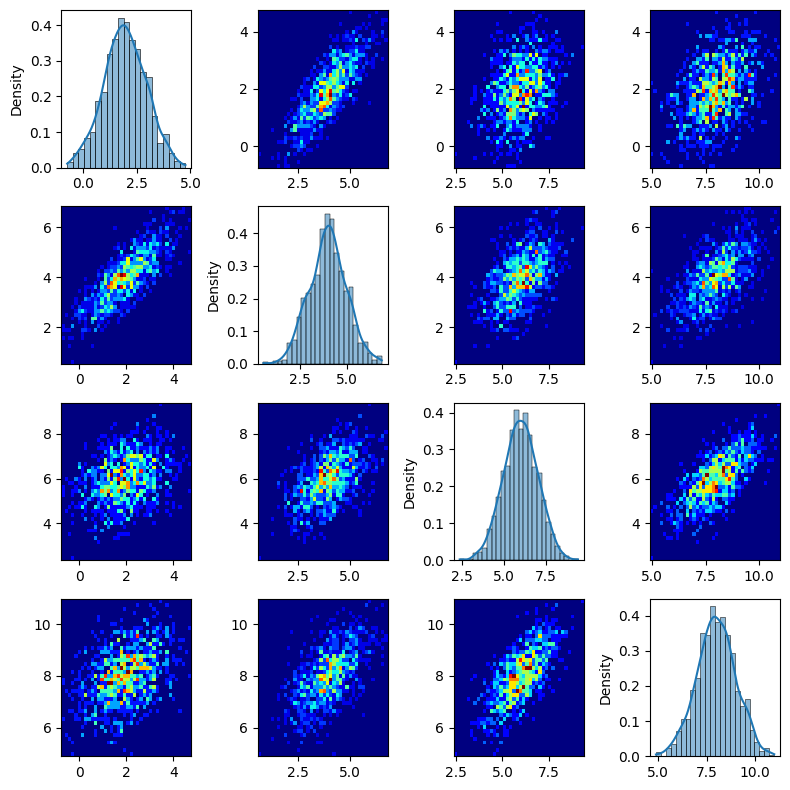

Media teórica:
 [2 4 6 8]
Media de la muestra:
 [1.95087809 3.97041958 5.98709044 8.00249283]

Covarianza teórica:
 [[1.  0.8 0.3 0.4]
 [0.8 1.  0.5 0.6]
 [0.3 0.5 1.  0.7]
 [0.4 0.6 0.7 1. ]]
Covarianza de la muestra:
 [[0.95822969 0.76626234 0.28666587 0.37845319]
 [0.76626234 0.97317216 0.50568971 0.57388347]
 [0.28666587 0.50568971 1.03039318 0.70061778]
 [0.37845319 0.57388347 0.70061778 0.99370712]]


In [12]:
# Parametros
n_samples = 1000  
n_dim = 4  

# Media 
mu = np.array([2, 4, 6, 8])

# Matriz de covarianza 
cov = np.array([
    [1.0, 0.8, 0.3, 0.4],
    [0.8, 1.0, 0.5, 0.6],
    [0.3, 0.5, 1.0, 0.7],
    [0.4, 0.6, 0.7, 1.0]
])

if not np.all(np.linalg.eigvals(cov) > 0):
    raise ValueError("La matriz de covarianza no es definida positiva.")

# Muestra aleatoria
samples = np.random.multivariate_normal(mean=mu, cov=cov, size=n_samples)

# Visualización con pyplot
plt.figure(figsize=(8, 8))
for i in range(0, n_dim):
    for j in range(0, n_dim):
        plt.subplot(n_dim, n_dim, n_dim * i + j + 1)
        if i == j:
            sns.histplot(samples[:, i], kde=True, stat="density")
        else:
            plt.hist2d(samples[:, j], samples[:, i], bins=(40, 40), cmap=plt.cm.jet)
plt.tight_layout()
plt.show()

# Medidas teoricas versus las de la muestra
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Media teórica:\n", mu)
print("Media de la muestra:\n", sample_mean)
print("\nCovarianza teórica:\n", cov)
print("Covarianza de la muestra:\n", sample_cov)


# Ejercicio 5 PCA

       0     1     2     3     4  ...     8     9    10    11        station
0   -3.9  -4.5  -2.3   1.2   5.4  ...  11.6   6.9   3.4  -1.5     St. John’s
1   -7.1  -7.5  -3.1   2.3   8.5  ...  13.5   8.1   2.9  -3.9  Charlottetown
2   -6.0  -6.1  -1.6   3.3   9.2  ...  13.8   8.6   3.4  -2.9        Halifax
3   -4.7  -5.9  -2.5   2.0   7.4  ...  13.5   8.4   3.8  -1.8         Sydney
4   -2.7  -3.2   0.3   4.7   9.2  ...  13.6   9.5   5.2  -0.3       Yarmouth
5   -9.2  -8.4  -2.4   4.1  10.8  ...  13.2   7.5   1.4  -6.5    Fredericton
6  -15.0 -13.1  -5.9   2.9  10.0  ...  11.9   6.1  -1.0 -11.3         Arvida
7  -10.2  -9.0  -2.5   5.7  13.0  ...  14.8   8.7   2.0  -6.9       Montreal
8  -12.1 -10.8  -4.5   3.3  10.8  ...  12.6   6.6  -0.2  -9.0    Quebec City
9  -22.8 -21.2 -15.1  -7.2   1.2  ...   5.2  -1.4  -9.0 -19.0  Schefferville
10 -11.7 -10.9  -4.3   3.6  10.6  ...  12.1   6.6   0.4  -8.2     Sherbrooke
11 -18.6 -16.2  -9.4   0.5   8.3  ...  10.0   4.4  -4.4 -14.7    Kapuskasing

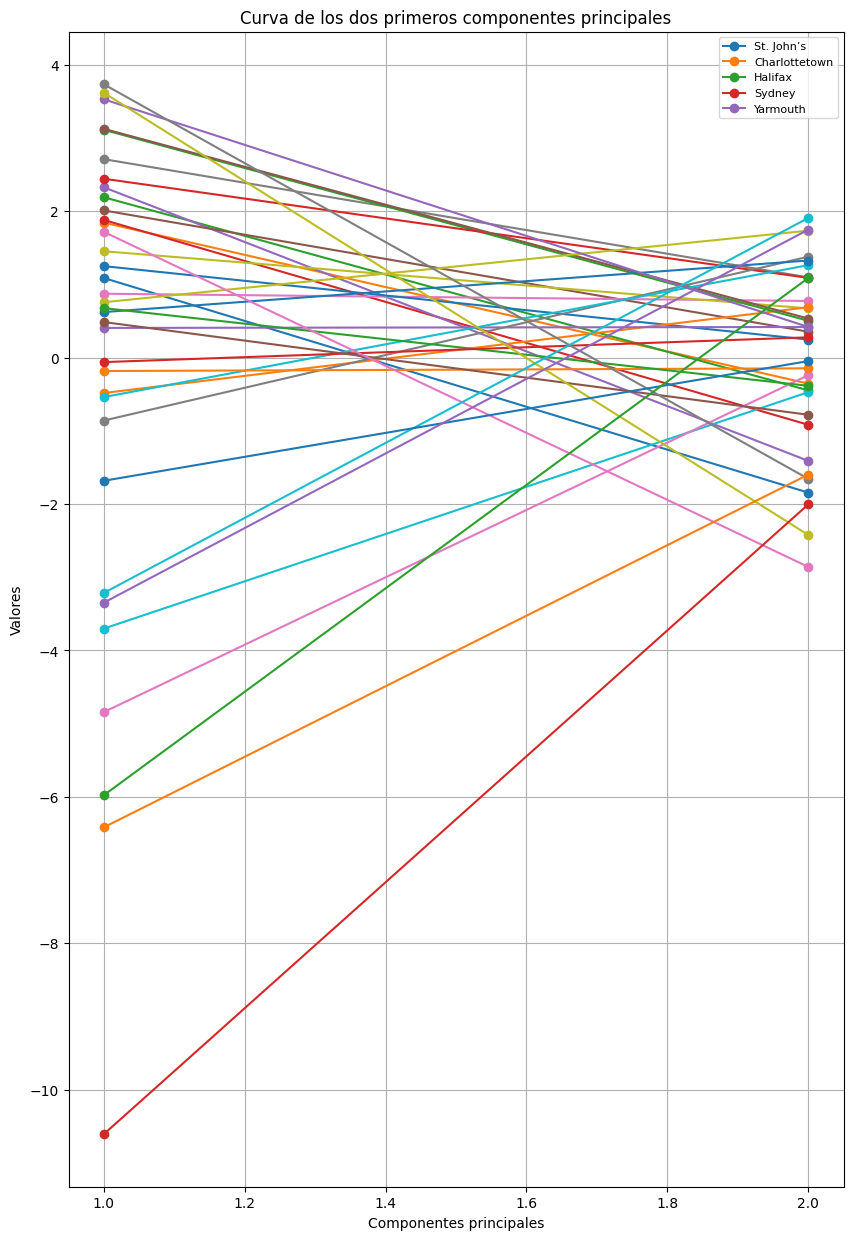

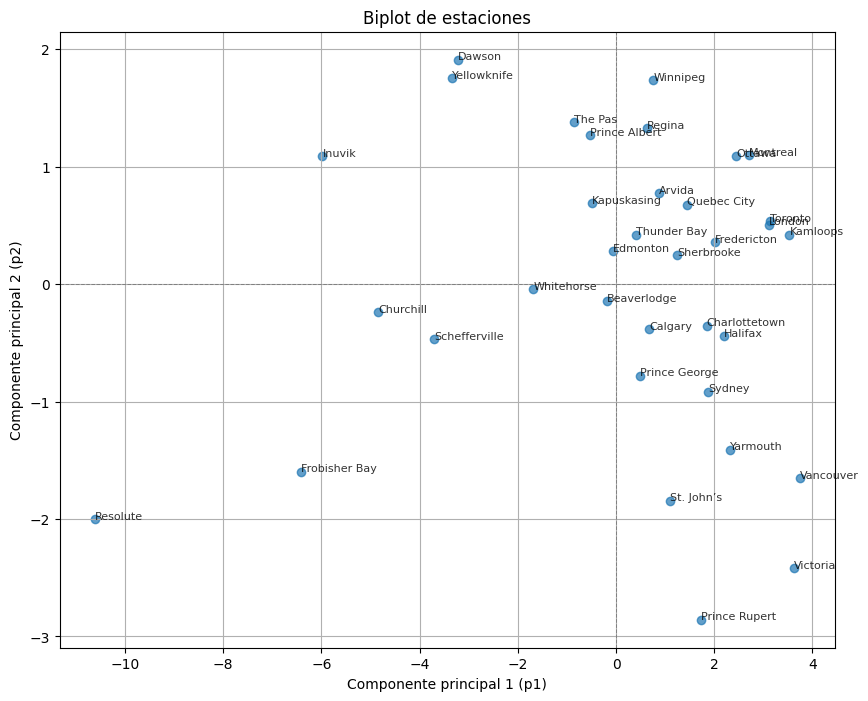

Proporción de varianza explicada por los componentes principales: [0.84836609 0.1243107 ]


In [33]:
weather_data = pd.read_csv('./CSV/weather.csv')

print(weather_data)

# Columnas de enero a diciembre
monthly_data = weather_data.select_dtypes(include=[np.number])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(monthly_data)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los primeros dos componentes
pca_df = pd.DataFrame(data=principal_components, columns=['p1', 'p2'])
pca_df['Station'] = weather_data['station']  

# Dibujar curva
plt.figure(figsize=(10, 15))
for index, row in pca_df.iterrows():
    plt.plot(range(1, 3), row[['p1', 'p2']], marker='o', label=row['Station'] if index < 5 else "")
plt.xlabel('Componentes principales')
plt.ylabel('Valores')
plt.title('Curva de los dos primeros componentes principales')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.show()

# Agrupar y representar en un biplot
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['p1'], pca_df['p2'], alpha=0.7)
for i, station in enumerate(weather_data['station']):
    plt.text(pca_df['p1'][i], pca_df['p2'][i], station, fontsize=8, alpha=0.8)
plt.xlabel('Componente principal 1 (p1)')
plt.ylabel('Componente principal 2 (p2)')
plt.title('Biplot de estaciones')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.show()

explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por los componentes principales:", explained_variance)


# Ejercicio 6